In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sdv.single_table import GaussianCopulaSynthesizer
from ctgan import CTGAN
from sklearn.svm import SVC
np.random.seed(10)

In [2]:
#Loading of dataset

df = pd.read_excel('PE_Try.xlsx')#To convert the given excel file which contains the original data to a dataframe

In [3]:
#Find shape of current dataframe

print(df.shape[0])
print(df.shape[1])

1164
4


In [4]:
#Change the dataframe to the one that is to be used

X = df[['Temperature', 'pH', 'Methane']]  # Features
y = df['Result']  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
#Random Forest (X_train etc defined above, run that code first by changing the dataframe)

# Assuming X_train, X_val, y_train, y_val are already defined from previous steps
# X_train and X_val are your features, y_train and y_val are your target

# Initialize and train a classifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = clf.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 1.0


In [14]:
#Linear Regression

# Assuming X_train, X_val, y_train, y_val are already defined from previous steps
# X_train and X_val are your features, y_train and y_val are your target

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred = linear_reg.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5324083673579036


In [15]:
#Logistic Regression (X_train etc defined above, first run that segment of code)

# Assuming X_train, X_val, y_train, y_val are already defined from previous steps
# X_train and X_val are your features, y_train and y_val are your target

# Initialize and train the logistic regression model
logistic_reg = LogisticRegression(max_iter=2000)
logistic_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logistic_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9570815450643777


In [17]:
#Gradient Boosting (X_train etc defined above, first run that segment of code)

# Assuming X_train, X_val, y_train, y_val are already defined from previous steps
# X_train and X_val are your features, y_train and y_val are your target

# Initialize and train the gradient boosting model
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = gb_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [204]:
file_path = 'PE_Try.xlsx'
data1 = pd.read_excel(file_path)

print(data1.head())

   Temperature      pH   Methane  Result
0        20.00  5.0000  0.000000       0
1        20.08  4.9875  0.005917       0
2        20.16  4.9750  0.011834       0
3        20.24  4.9625  0.017751       0
4        20.32  4.9500  0.023669       0


In [205]:
print(data1.shape[0])
print(data1.shape[1])

1164
4


In [206]:
#To initialise and fit the CTGAN model on the current dataset

ctgan = CTGAN()

#Here Result will give values from 0,1,2,3. Hence, we have to define it as discrete column
discrete_columns = ['Result']

# Fit CTGAN model
ctgan.fit(data1, discrete_columns, epochs=10)  # You might want to experiment with the number of epochs

# Generate synthetic data
synthetic_data = ctgan.sample(20000)

# Display the first few rows of the synthetic data
print(synthetic_data.head())

   Temperature        pH   Methane  Result
0    42.917531  5.132185  2.253097       0
1    23.769903  4.204331  3.984917       2
2    56.094155  8.756094  4.136452       0
3    42.253743  7.019250  0.240732       3
4    44.480511  7.156038  3.157119       0


In [207]:
# Prepare features and target
X_synthetic = synthetic_data.drop(['Result', 'Methane'], axis=1)
y_synthetic = synthetic_data['Result']

X_real = data1.drop(['Result', 'Methane'], axis=1)
y_real = data1['Result']

# Split real data for testing
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2)

In [208]:
#Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred = model.predict(X_test_real)
accuracy = accuracy_score(y_test_real, y_pred)

print("Accuracy on real test data:", accuracy)

Accuracy on real test data: 0.27467811158798283


In [209]:
#Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred_lr = model_lr.predict(X_test_real)
accuracy_lr = accuracy_score(y_test_real, y_pred_lr)

print("Logistic Regression Accuracy on real test data:", accuracy_lr)

Logistic Regression Accuracy on real test data: 0.3562231759656652


In [210]:
model_rf = RandomForestClassifier()
model_rf.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred_rf = model_rf.predict(X_test_real)
accuracy_rf = accuracy_score(y_test_real, y_pred_rf)

print("Random Forest Accuracy on real test data:", accuracy_rf)

Random Forest Accuracy on real test data: 0.26180257510729615


In [211]:
model_svm = SVC()
model_svm.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred_svm = model_svm.predict(X_test_real)
accuracy_svm = accuracy_score(y_test_real, y_pred_svm)

print("SVM Accuracy on real test data:", accuracy_svm)

SVM Accuracy on real test data: 0.3562231759656652


In [212]:
from xgboost import XGBClassifier

# Create XGBoost classifier with default parameters
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred_xgb = model_xgb.predict(X_test_real)
accuracy_xgb = accuracy_score(y_test_real, y_pred_xgb)

print("XGBoost Accuracy on real test data:", accuracy_xgb)

XGBoost Accuracy on real test data: 0.2918454935622318


In [213]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier with default parameters
model_knn = KNeighborsClassifier()
model_knn.fit(X_synthetic, y_synthetic)

# Test on real data
y_pred_knn = model_knn.predict(X_test_real)
accuracy_knn = accuracy_score(y_test_real, y_pred_knn)

print("KNN Accuracy on real test data:", accuracy_knn)

KNN Accuracy on real test data: 0.296137339055794


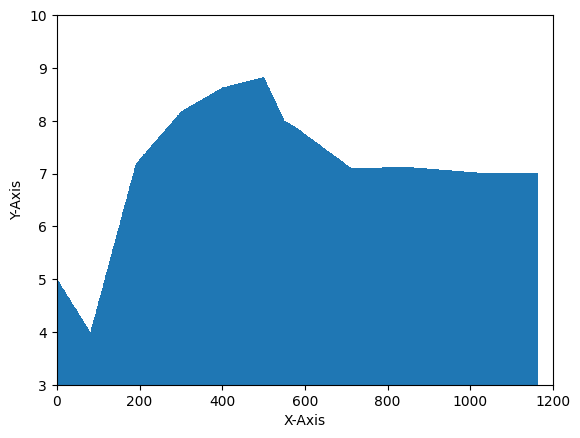

In [41]:
import matplotlib.pyplot as plt 
import pandas as pd 
file = pd.read_excel('PE_Try.xlsx') 
x_axis = file['Days'] 
y_axis = file['pH'] 
plt.bar(x_axis, y_axis, width=1) 
plt.ylim(3, 10)
plt.xlim(0,1200)
plt.xlabel("X-Axis") 
plt.ylabel("Y-Axis") 
plt.show() 

In [15]:
data1.describe()

,Temperature,pH,Days,Methane,Result
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,43.285524,7.192699,582.500000,2.065172,1.017182
std,14.953896,1.137215,336.162163,1.077858,0.895031
min,20.000000,4.000000,1.000000,0.000000,0.000000
25%,29.607500,7.011643,291.750000,1.378468,0.000000
50%,41.930000,7.117306,582.500000,2.000000,1.000000
75%,55.560000,7.937533,873.250000,2.844948,2.000000
max,70.050000,8.830000,1164.000000,4.100000,3.000000


In [16]:
synthetic_data.describe()

,Temperature,pH,Days,Methane,Result
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,45.068344,6.749473,848.492600,3.075383,1.362250
std,15.796833,1.350426,327.058812,1.047116,1.089213
min,8.385670,3.187609,-177.000000,-0.558586,0.000000
25%,31.516519,5.569398,621.000000,2.226280,0.000000
50%,44.166806,7.112561,916.000000,3.131213,1.000000
75%,57.651328,7.568955,1109.000000,4.001340,2.000000
max,86.174784,9.434799,1498.000000,5.195518,3.000000
